# Simple Moving Average

In [135]:
import pandas as pd
import numpy as np
raw = pd.read_csv('data/pyalgo_eikon_eod_data.csv',
                 index_col=0, parse_dates=True).dropna()

In [111]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [112]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [113]:
data = pd.DataFrame(raw['EUR='])

In [114]:
data.head()

,EUR=
Date,
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
2010-01-08,1.4412


In [115]:
data.rename(columns={'EUR=': 'price'}, inplace=True)

In [116]:
data.head()

,price
Date,
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
2010-01-08,1.4412


In [117]:
data['SMA1'] = data['price'].rolling(42).mean()
data['SMA2'] = data['price'].rolling(252).mean()
data.tail()

,price,SMA1,SMA2
Date,,,
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333
2019-12-31,1.1210,1.108279,1.119231


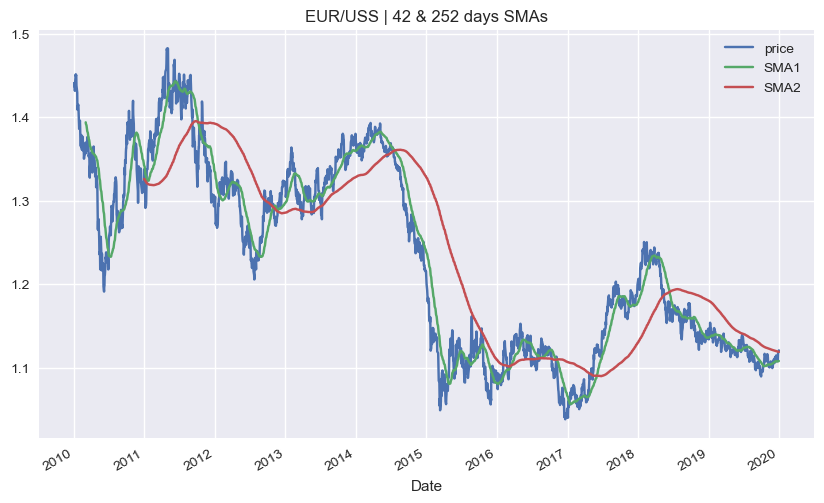

In [118]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'sans-serif'
data.plot(title='EUR/USS | 42 & 252 days SMAs',
          figsize=(10, 6));

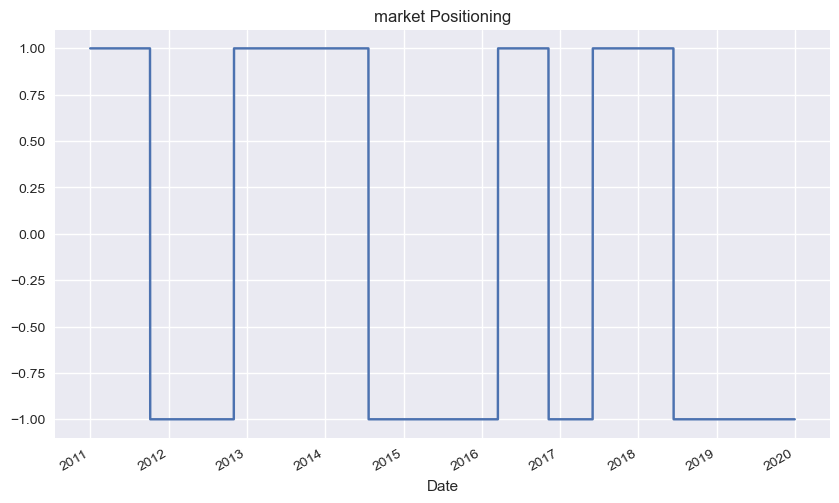

In [119]:
# simple strategy of long when SMA1 is above SMA2
data['position'] = np.where(data['SMA1'] > data['SMA2'],
                            1, -1)
data.dropna(inplace=True)
data['position'].plot(ylim=[-1.1, 1.1],
                     title='market Positioning',
                     figsize=(10,6));

## Log returns

In [120]:
data.price.head()

Date
2010-12-31    1.3377
2011-01-03    1.3351
2011-01-04    1.3301
2011-01-05    1.3151
2011-01-06    1.3001
Name: price, dtype: float64

In [121]:
data.price.shift(1).head()

Date
2010-12-31       NaN
2011-01-03    1.3377
2011-01-04    1.3351
2011-01-05    1.3301
2011-01-06    1.3151
Name: price, dtype: float64

<AxesSubplot:>

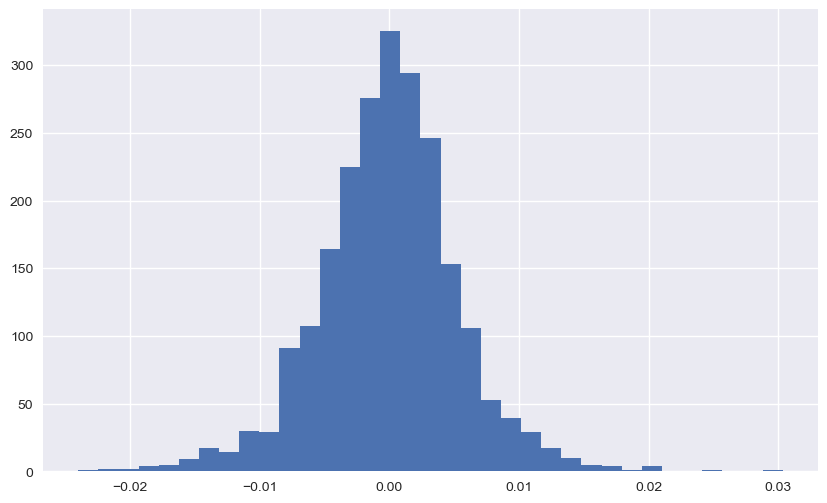

In [122]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))
data['returns'].hist(bins=35, figsize=(10, 6))

## Performance of the strategy

In [123]:
# assume shorting is allowed
data['strategy'] = data['position'].shift(1) * data['returns']
data[['returns', 'strategy']]

,returns,strategy
Date,,
2010-12-31,NaN,NaN
2011-01-03,-0.001946,-0.001946
2011-01-04,-0.003752,-0.003752
2011-01-05,-0.011341,-0.011341
2011-01-06,-0.011472,-0.011472
...,...,...
2019-12-24,0.000090,-0.000090
2019-12-26,0.000811,-0.000811
2019-12-27,0.007094,-0.007094


In [124]:
data[['returns', 'strategy']].sum()

returns    -0.176731
strategy    0.253121
dtype: float64

In [125]:
total_log_returns = data[['returns', 'strategy']].sum()

In [126]:
type(total_log_returns)

pandas.core.series.Series

In [127]:
total_returns = total_log_returns.apply(np.exp)

In [128]:
total_returns

returns     0.838006
strategy    1.288039
dtype: float64

## Cumulative returns

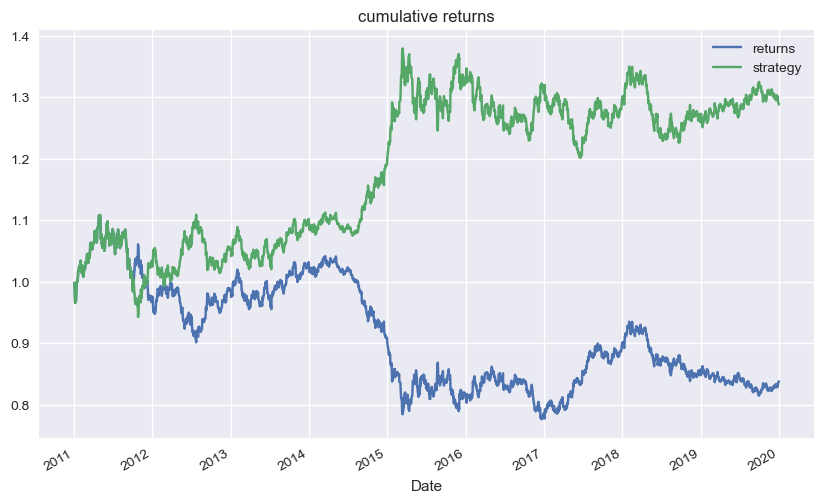

In [129]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(title='cumulative returns', figsize=(10, 6));

### Annualized mean return in log and regular space

In [130]:
data[['returns', 'strategy']].mean() * 252

returns    -0.019671
strategy    0.028174
dtype: float64

In [131]:
np.exp(data[['returns', 'strategy']].mean() * 252) - 1

returns    -0.019479
strategy    0.028575
dtype: float64

### Annualized standard deviation in log and regular space

In [132]:
data[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.085414
strategy    0.085405
dtype: float64

In [133]:
regular_returns = data[['returns', 'strategy']].apply(np.exp)
regular_returns

,returns,strategy
Date,,
2010-12-31,NaN,NaN
2011-01-03,0.998056,0.998056
2011-01-04,0.996255,0.996255
2011-01-05,0.988723,0.988723
2011-01-06,0.988594,0.988594
...,...,...
2019-12-24,1.000090,0.999910
2019-12-26,1.000812,0.999189
2019-12-27,1.007120,0.992931


In [134]:
(regular_returns - 1).std() * 252 ** 0.5

returns     0.085405
strategy    0.085373
dtype: float64